# Análise Exploratória
Na minha opinião, a análise exploratória é uma das fases mais importantes de qualquer projeto que lide com dados. Aqui o objetivo é entender o contexto em que trabalharemos e como são os dados que temos que explorar, para termos toda uma documentação que precisaremos para criar os próximos algoritmos, mesmo os de Machine Learning. Acredito que mesmo nesta fase já podemos encontrar alguns Insights.

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/Sinasc/image/Copetina.png" alt="capa">

---

# **SINASC** • Sistema de Informação sobre Nascidos Vivos
Uma pesquisa abrangente sobre tendências demográficas e de saúde em 2019 no estado de Rondônia, no Brasil. Comecemos por analisar os dados do sistema de informação sobre nascidos vivos (SINASC), o objetivo é realizar uma análise aprofundada do tema, este projeto visa encontrar ideias e responder a uma série de questões cruciais.

**Data Science** Portfólio | *27 Abril 2024*

[Enzo Schitini](https://www.linkedin.com/in/enzoschitini/) - Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator

---

## O que você vai encontrar neste notebook? 👋

Assim que a análise exploratória for concluída, prosseguiremos para identificar insights significativos e tendências emergentes nos dados. Usaremos abordagens estatísticas e analíticas para identificar correlações, padrões e associações entre variáveis. Através do uso de técnicas analíticas, tentaremos extrair informações relevantes e úteis para melhor compreender os fatores que influenciam a saúde neonatal em Rondônia. Além disso, exploraremos o impacto das variáveis ​​socioeconómicas e demográficas na saúde materna e nas condições de nascimento.

#### - *Contexto os dados*
Bem-vindos à análise exaustiva dos dados relativos aos recém-nascidos nascidos no estado de Rondônia, Brasil, no ano de 2019. Este projeto nos permite explorar e compreender as tendências demográficas e de saúde desta região através da análise detalhada dos dados fornecidos pelo Sistema de Informações sobre Nascimento (SINASC).

Com um enfoque incisivo nos recém-nascidos, este conjunto de dados contém uma riqueza de informações cruciais, desde a saúde materna e as condições de nascimento até à distribuição demográfica e factores socioeconómicos. Os dados recolhidos oferecem uma visão única da saúde da população recém-nascida, permitindo aos analistas identificar tendências significativas, identificar pontos críticos e propor soluções inovadoras para melhorar o bem-estar dos recém-nascidos e das suas famílias.

O conjunto de dados pode ser encontrado no site do governo brasileiro e segue políticas de privacidade, o que significa que não há nomes de pessoas ou qualquer coisa que nos permita saber quem são os indivíduos.

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/Sinasc/image/fonte.png" alt="capa" width="310">


> Os dados foram fornecidos pelo [DATASUS](https://datasus.saude.gov.br/)

## 🔥 Vamos começar!!!

### **`Tópicos`**

<ol type="1">
  <li>Preparação o ambiente de desenvolvimento</li>
  <li>Estrutura e tratamento dos dados e colunas</li>
  <li>Visualização</li>
  <li>Métricas</li>
  <li>Conclusão e hipótese</li>
</ol>

##### Abaixo você encontrará algumas insights e códigos sobre esses dados. Mas se quiser acessar um material somente com os insights, baixe o [PDF](https://drive.google.com/file/d/1fK1ocDTSzMpDhKy8jJ1yU3LN1Tm-gxcV/view?usp=drivesdk)

---

## Preparação o ambiente de desenvolvimento

### Importando os pacotes

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import missingno as msno
import calendar
from pandas_profiling import ProfileReport

from main import GuidaDataframe
pd.set_option('display.max_columns', None)

### Carregando os Datasets

In [262]:
df = pd.read_csv('Data\SINASC_RO_2019.csv')

- `Informações sobre os data sets:`

| Nome da variável  | Descrição |
| ------- | --------- |
| dfs[0] | conjunto de dados dos clientes |
| dfs[1] | conjunto de dados de geolocalização |
| dfs[2] | conjunto de dados de itens de pedido |
| dfs[3] | conjunto de dados de pagamentos de pedidos |
| dfs[4] | conjunto de dados de análises de pedidos |
| dfs[5] | conjunto de dados de pedidos |
| dfs[6] | conjunto de dados de produtos |
| dfs[7] | conjunto de dados de vendedores |
| dfs[8] | tradução do nome da categoria do produto |

### Mostrando o DataFrame

In [263]:
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9.0,10.0,Branca,3685,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,17,NaN,811.0,110001.0,11.0,3.0,NaN,20121999.0,1.0,0.0,0.0,0.0,26.0,15052018.0,39.0,8.0,8.0,1.0,1.0,2.0,2.0,1.0,2.0,3.0,19022019.0,12.0,0,1,1,1,0,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8.0,9.0,Branca,3055,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,15,NaN,811.0,110015.0,11.0,3.0,NaN,27041989.0,1.0,1.0,0.0,1.0,24.0,27052018.0,38.0,8.0,10.0,2.0,1.0,2.0,2.0,1.0,5.0,4.0,21022019.0,12.0,0,1,1,5,1,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8.0,10.0,Branca,3460,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,11,NaN,841.0,410045.0,41.0,3.0,NaN,6031981.0,1.0,2.0,1.0,1.0,32.0,18052018.0,40.0,8.0,8.0,1.0,2.0,2.0,2.0,1.0,2.0,4.0,25022019.0,12.0,0,1,1,7,1,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,110037,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9.0,10.0,Parda,2982,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,20,NaN,841.0,410480.0,41.0,5.0,NaN,15071988.0,4.0,0.0,0.0,0.0,24.0,25062018.0,38.0,8.0,6.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,20032019.0,8.0,0,1,1,2,0,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8.0,10.0,Parda,3310,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,17,NaN,811.0,110001.0,11.0,3.0,NaN,12111988.0,4.0,1.0,0.0,1.0,27.0,27062018.0,38.0,8.0,8.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,23032019.0,12.0,0,1,1,5,1,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


## Estrutura e tratamento dos dados e colunas

Entender a estrutura dos dados significa saber quantas Linhas e Colunas existem, se há dados duplicados ou não, o Nome das colunas, seu Tipo, sua quantidade de categorias, quantos dados nulos, a porcentagem deles e etc.

### Remover duplicados

In [264]:
df.drop_duplicates(inplace=True)

### Estrutura das colunas

- Selecionando as colunas

In [265]:
columns = [
       # Em uso
       'ORIGEM', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'QTDFILVIVO', 'QTDFILMORT',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'DTRECORIGA', 'NATURALMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 
       'CONSPRENAT', 'MESPRENAT', 'munResStatus', 'munResTipo', 'munResNome', 'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       
       # 
       'SEMAGESTAC', 'CODANOMAL', 'DIFDATA', 'DTRECEBIM', 'VERSAOSIST', 'NUMEROLOTE', 'CODMUNRES',
       'CODOCUPMAE', 'CODMUNNASC', 'CODESTAB', 'TPMETESTIM', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR']

In [266]:
df = df[['ORIGEM', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
    'ESCMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 
    'DTNASC', 'HORANASC', 'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 
    'DTCADASTRO', 'DTRECORIGA', 'NATURALMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 
    'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'CONSPRENAT', 'MESPRENAT', 
    'munResStatus', 'munResTipo', 'munResNome', 'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea']]

Agora vamos ver com mais detalhes como é a estrutura das colunas usando a função `esplorazione()` do pacote `main.py`

In [267]:
Tabela_Exploratoria = GuidaDataframe(df).esplorazione()
Tabela_Exploratoria

Tabela Exploratória
Nesses dados temos 27.028 linhas e 38 colunas.
Consumo de memória: 27.68Mb.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
1,ORIGEM,numpy.int64,1,0,0.0,0.0
2,LOCNASC,numpy.int64,4,0,0.0,0.0
3,IDADEMAE,numpy.int64,40,0,0.0,0.0
4,ESTCIVMAE,numpy.float64,6,317,1.0,0.0
5,ESCMAE,str,5,312,1.0,2.0
6,QTDFILVIVO,numpy.float64,15,1573,6.0,0.0
7,QTDFILMORT,numpy.float64,11,2098,8.0,0.0
8,GESTACAO,str,6,1232,5.0,2.0
9,GRAVIDEZ,str,3,79,0.0,2.0
10,PARTO,str,2,49,0.0,2.0


### Dados faltantes

In [268]:
# GRAVIDEZ PARTO HORANASC SEXO APGAR1 APGAR5 DTNASCMAE 
# munResLat munResLon munResAlt munResArea

<Axes: >

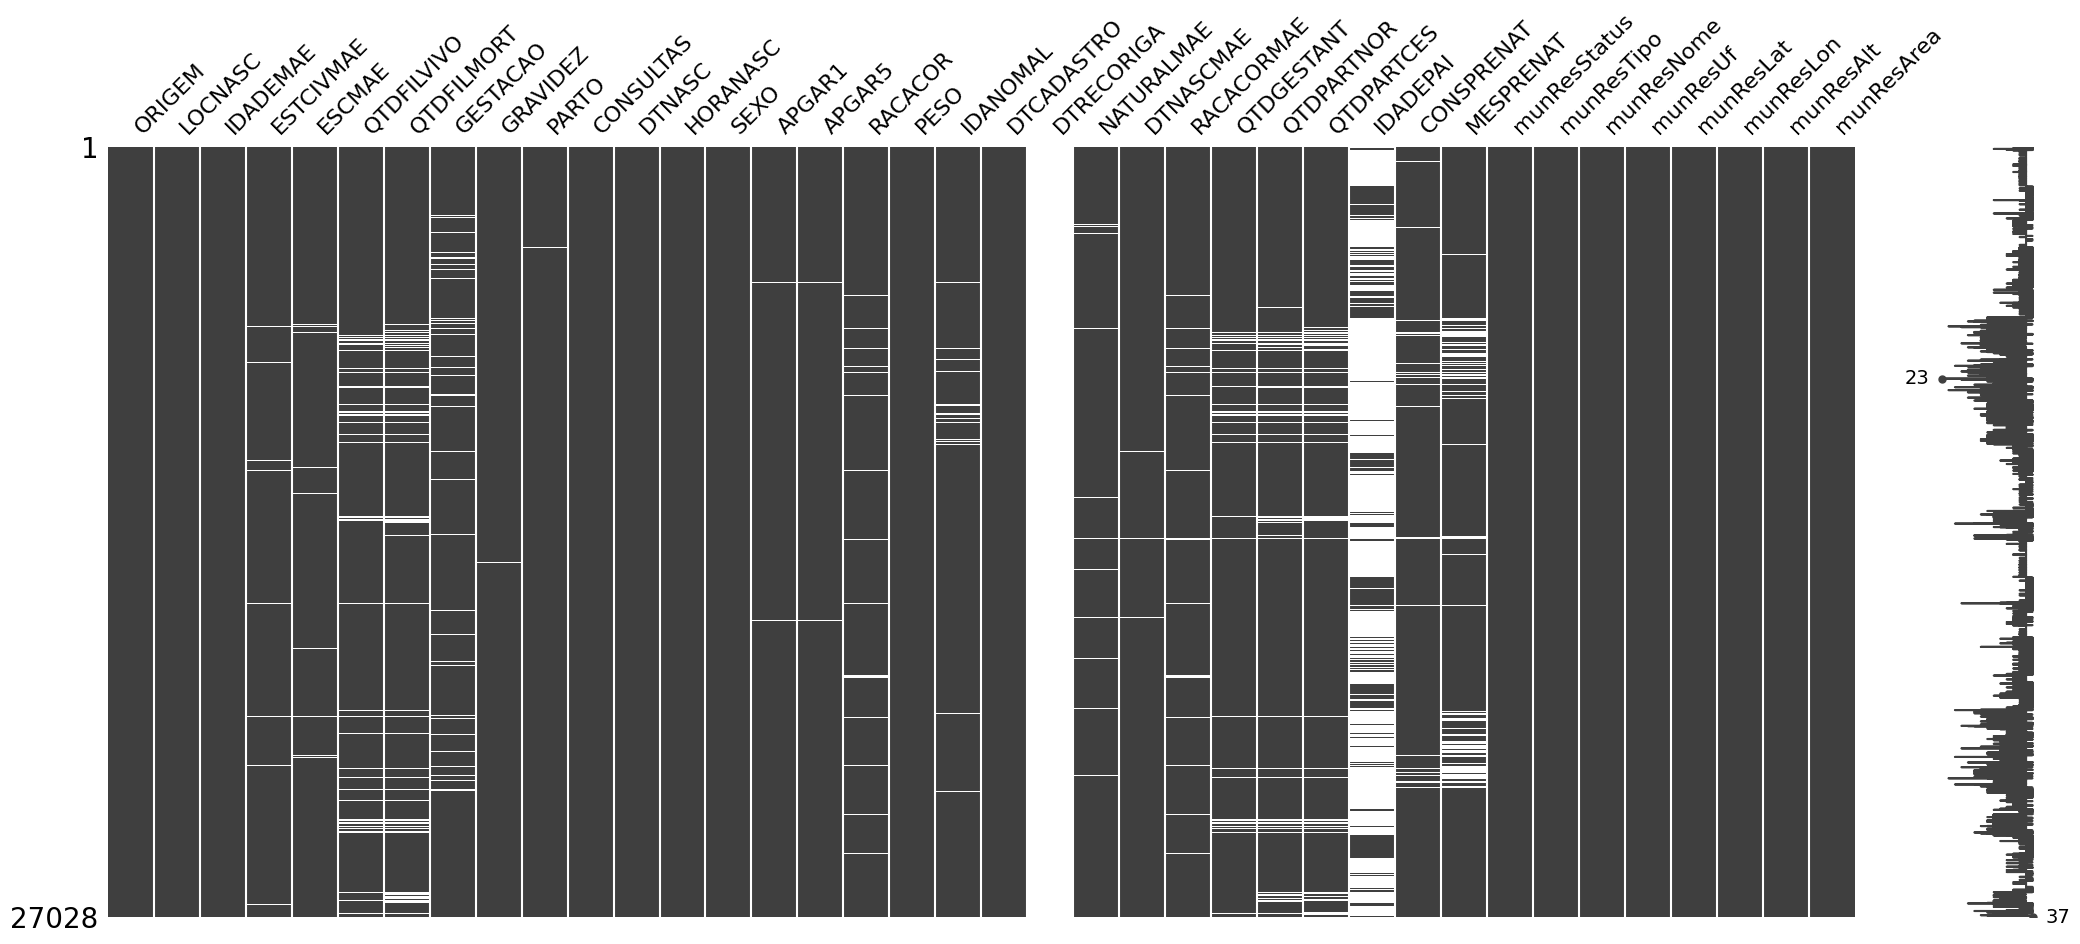

In [269]:
msno.matrix(df)

Entre os conjuntos de dados que possuem dados nulos estão: 

In [270]:
Tabela_Exploratoria[Tabela_Exploratoria['Dados nulos %'] > 0.0]

,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
4,ESTCIVMAE,numpy.float64,6,317,1.0,0.0
5,ESCMAE,str,5,312,1.0,2.0
6,QTDFILVIVO,numpy.float64,15,1573,6.0,0.0
7,QTDFILMORT,numpy.float64,11,2098,8.0,0.0
8,GESTACAO,str,6,1232,5.0,2.0
17,RACACOR,str,5,647,2.0,2.0
19,IDANOMAL,numpy.float64,3,591,2.0,0.0
21,DTRECORIGA,numpy.float64,0,27028,100.0,0.0
22,NATURALMAE,numpy.float64,27,298,1.0,0.0
24,RACACORMAE,numpy.float64,5,661,2.0,0.0


#### *Agora vamos analisar os dados nulos do Data Frame*

- **`DTRECORIGA`** ->  ########################################################
########################################################

In [271]:
df.drop(columns='DTRECORIGA', axis=1, inplace=True)

In [272]:
df.dropna(subset=['ESTCIVMAE'], inplace=True)
df.dropna(subset=['ESCMAE'], inplace=True)
df.dropna(subset=['RACACOR'], inplace=True)
df.dropna(subset=['IDANOMAL'], inplace=True)
df.dropna(subset=['NATURALMAE'], inplace=True)
df.dropna(subset=['RACACORMAE'], inplace=True)
df.dropna(subset=['CONSPRENAT'], inplace=True)

In [273]:
Tabela_Exploratoria = GuidaDataframe(df).esplorazione()
nulos = Tabela_Exploratoria[['Nome', 'Dados nulos']][(Tabela_Exploratoria['Dados nulos'] > 0) & (Tabela_Exploratoria['Dados nulos'] <= 2098)]
nulos

Tabela Exploratória
Nesses dados temos 24.332 linhas e 37 colunas.
Consumo de memória: 25.48Mb.


,Nome,Dados nulos
6,QTDFILVIVO,1282
7,QTDFILMORT,1740
8,GESTACAO,841
9,GRAVIDEZ,59
10,PARTO,32
13,HORANASC,18
14,SEXO,4
15,APGAR1,68
16,APGAR5,75
22,DTNASCMAE,21


In [274]:
nulos_lista = nulos['Nome'].to_list()

def fill_nulls_by_column_characteristics(df, column_name):
    if pd.api.types.is_numeric_dtype(df[column_name]):
        # For numeric columns, fill nulls with the median value
        median_value = df[column_name].median()
        df[column_name] = df[column_name].fillna(median_value)
    else:
        # For categorical columns, fill nulls with the mode (most frequent value)
        mode_value = df[column_name].mode()[0]
        df[column_name] = df[column_name].fillna(mode_value)
    return df

for column in nulos_lista:
    df = fill_nulls_by_column_characteristics(df, column)

In [275]:
Tabela_Exploratoria = GuidaDataframe(df).esplorazione()
nulos = Tabela_Exploratoria[['Nome', 'Dados nulos %']][Tabela_Exploratoria['Dados nulos %'] > 0.0]
nulos

Tabela Exploratória
Nesses dados temos 24.332 linhas e 37 colunas.
Consumo de memória: 25.81Mb.


,Nome,Dados nulos %
27,IDADEPAI,71.0


> `Atenção!`

### Reparando as colunas do data frame

In [276]:
numpy_int64 = Tabela_Exploratoria[Tabela_Exploratoria['Tipo'] == 'numpy.int64']['Nome'].to_list()
str_col = Tabela_Exploratoria[Tabela_Exploratoria['Tipo'] == 'str']['Nome'].to_list()
numpy_float64 = Tabela_Exploratoria[Tabela_Exploratoria['Tipo'] == 'numpy.float64']['Nome'].to_list()

In [277]:
print('Colunas numpy.int64:')
display(df[numpy_int64].head())
print('\nColunas str:')
display(df[str_col].head())
print('\nColunas numpy.float64:')
display(df[numpy_float64].head())

Colunas numpy.int64:


,ORIGEM,LOCNASC,IDADEMAE,CONSULTAS,PESO
0,1,1,19,4,3685
1,1,1,29,4,3055
2,1,1,37,4,3460
3,1,1,30,3,2982
4,1,1,30,4,3310



Colunas str:


,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia



Colunas numpy.float64:


,ESTCIVMAE,QTDFILVIVO,QTDFILMORT,HORANASC,APGAR1,APGAR5,IDANOMAL,NATURALMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,CONSPRENAT,MESPRENAT,munResLat,munResLon,munResAlt,munResArea
0,5.0,0.0,0.0,1620.0,9.0,10.0,2.0,811.0,20121999.0,1.0,0.0,0.0,0.0,26.0,8.0,1.0,-11.93554,-61.99982,338.0,7067.025
1,2.0,1.0,0.0,1830.0,8.0,9.0,2.0,811.0,27041989.0,1.0,1.0,0.0,1.0,24.0,10.0,2.0,-11.93554,-61.99982,338.0,7067.025
2,9.0,2.0,0.0,915.0,8.0,10.0,2.0,841.0,6031981.0,1.0,2.0,1.0,1.0,32.0,8.0,1.0,-11.93554,-61.99982,338.0,7067.025
3,5.0,0.0,0.0,835.0,9.0,10.0,2.0,841.0,15071988.0,4.0,0.0,0.0,0.0,24.0,6.0,2.0,-12.13178,-61.85308,397.0,3958.273
4,2.0,1.0,0.0,750.0,8.0,10.0,2.0,811.0,12111988.0,4.0,1.0,0.0,1.0,27.0,8.0,2.0,-11.93554,-61.99982,338.0,7067.025


### Reparando as colunas de data

In [278]:
df['DTNASC'] = pd.to_datetime(df['DTNASC'])
df['DTCADASTRO'] = pd.to_datetime(df['DTCADASTRO'])
df['DTNASCMAE'] = pd.to_datetime(df['DTCADASTRO'])

### Reparando as colunas numéricas `int` e `float`

In [279]:
df['PESO'] = df['PESO'].astype(float)
df['HORANASC'] = df['HORANASC'].fillna(0).astype(float)

In [280]:
df['IDADEPAI'] = df['IDADEPAI'].fillna(0).astype(int)

In [281]:
df['IDANOMAL'] = df['IDANOMAL'].astype(int)
df['NATURALMAE'] = df['NATURALMAE'].astype(int)
df['RACACORMAE'] = df['RACACORMAE'].astype(int)
df['CONSPRENAT'] = df['CONSPRENAT'].astype(int)
df['QTDFILVIVO'] = df['QTDFILVIVO'].astype(int)
df['QTDFILMORT'] = df['QTDFILMORT'].astype(int)
df['APGAR1'] = df['APGAR1'].astype(int)
df['APGAR5'] = df['APGAR5'].astype(int)
df['QTDGESTANT'] = df['QTDGESTANT'].astype(int)
df['QTDPARTNOR'] = df['QTDPARTNOR'].astype(int)
df['QTDPARTCES'] = df['QTDPARTCES'].astype(int)

### Reparando as colunas de texto
Para cada coluna de nossos conjuntos de dados, transformaremos agora aquelas que são do tipo `str` para `category`. Desta forma podemos economizar espaço de memória e ter melhor desempenho na execução do algoritmo

Vamos transformar isso agora em category!!! A função que você vê abaixo faz isso em todos os Data sets

In [282]:
def str_to_category(dataframe:pd.DataFrame):
    dataframe = pd.DataFrame(dataframe)
    lista_colunas_str = dataframe.select_dtypes('object').columns.to_list()

    for coluna in lista_colunas_str:
        dataframe[coluna] = dataframe[coluna].astype('category')
    return dataframe

df = str_to_category(df)

In [283]:
pd.DataFrame(df.dtypes)

,0
ORIGEM,int64
LOCNASC,int64
IDADEMAE,int64
ESTCIVMAE,float64
ESCMAE,category
QTDFILVIVO,int32
QTDFILMORT,int32
GESTACAO,category
GRAVIDEZ,category
PARTO,category


In [284]:
df.head()

,ORIGEM,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,NATURALMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,CONSPRENAT,MESPRENAT,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,1,19,5.0,8 a 11 anos,0,0,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9,10,Branca,3685.0,2,2019-03-08,811,2019-03-08,1,0,0,0,26,8,1.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,1,29,2.0,8 a 11 anos,1,0,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8,9,Branca,3055.0,2,2019-03-08,811,2019-03-08,1,1,0,1,24,10,2.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,1,37,9.0,8 a 11 anos,2,0,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8,10,Branca,3460.0,2,2019-03-08,841,2019-03-08,1,2,1,1,32,8,1.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,1,30,5.0,12 anos ou mais,0,0,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9,10,Parda,2982.0,2,2019-04-03,841,2019-04-03,4,0,0,0,24,6,2.0,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,1,30,2.0,8 a 11 anos,1,0,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8,10,Parda,3310.0,2,2019-04-03,811,2019-04-03,4,1,0,1,27,8,2.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


## Visualização

Ajustes nos dados

### Engenharia de atributos
Agora que temos todos os nossos dados em um `df` podemos criar novas colunas baseadas em outras

- Mapping

In [285]:
mapping_day = {"Monday": "Segunda-feira", 
           "Tuesday": "Terça-feira", 
           "Wednesday": "Quarta-feira",
           "Thursday": "Quinta-feira",
           "Friday": "Sexta-feira",
           "Saturday": "Sábado",
           "Sunday": "Domingo"}

mapping_month = {"January": "Janeiro",
                 "February": "Fevereiro",
                 "March": "Março",
                 "April": "Abril",
                 "May": "Maio", 
                 "June": "Junho", 
                 "July": "Julho",
                 "August": "Agosto",
                 "September": "Setembro",
                 "October": "Outubro",
                 "November": "Novembro",
                 "December": "Dezembro"}

- `DTNASC`

In [286]:
df['DTNASC_DIA'] = df['DTNASC'].dt.day_name().replace(mapping_day).astype('category')
df['DTNASC_MES'] = df['DTNASC'].dt.month_name().replace(mapping_month).astype('category')

- `DTCADASTRO`

In [287]:
df['DTCADASTRO_DIA'] = df['DTCADASTRO'].dt.day_name().replace(mapping_day).astype('category')
df['DTCADASTRO_MES'] = df['DTCADASTRO'].dt.month_name().replace(mapping_month).astype('category')

- `DTNASCMAE`

In [288]:
df['DTNASCMAE_DIA'] = df['DTNASCMAE'].dt.day_name().replace(mapping_day).astype('category')
df['DTNASCMAE_MES'] = df['DTNASCMAE'].dt.month_name().replace(mapping_month).astype('category')

### Organizando as colunas

In [289]:
df = df[['IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 'QTDFILMORT',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'NATURALMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'CONSPRENAT', 'MESPRENAT', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       'DTNASC_DIA', 'DTNASC_MES', 'DTCADASTRO_DIA', 'DTCADASTRO_MES',
       'DTNASCMAE_DIA', 'DTNASCMAE_MES']]

In [290]:
# ORIGEM LOCNASC munResStatus munResTipo

### Pandas Profile

In [291]:
prof = ProfileReport(df, explorative=True, minimal=True)
prof.to_file('./Sinasc_2019.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profiling\model\typeset.py:125: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  not pdt.is_categorical_dtype(series)
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profiling\model\typeset.py:208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_valid_dtype = pdt.is_categorical_dtype(series) and not pdt.is_bool_dtype(
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profiling\model\typeset.py:125: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  not pdt.is_categorical_dtype(series)
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profil

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Distribuição de algumas colunas categóricas

### Outliers & Boxplots

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecat

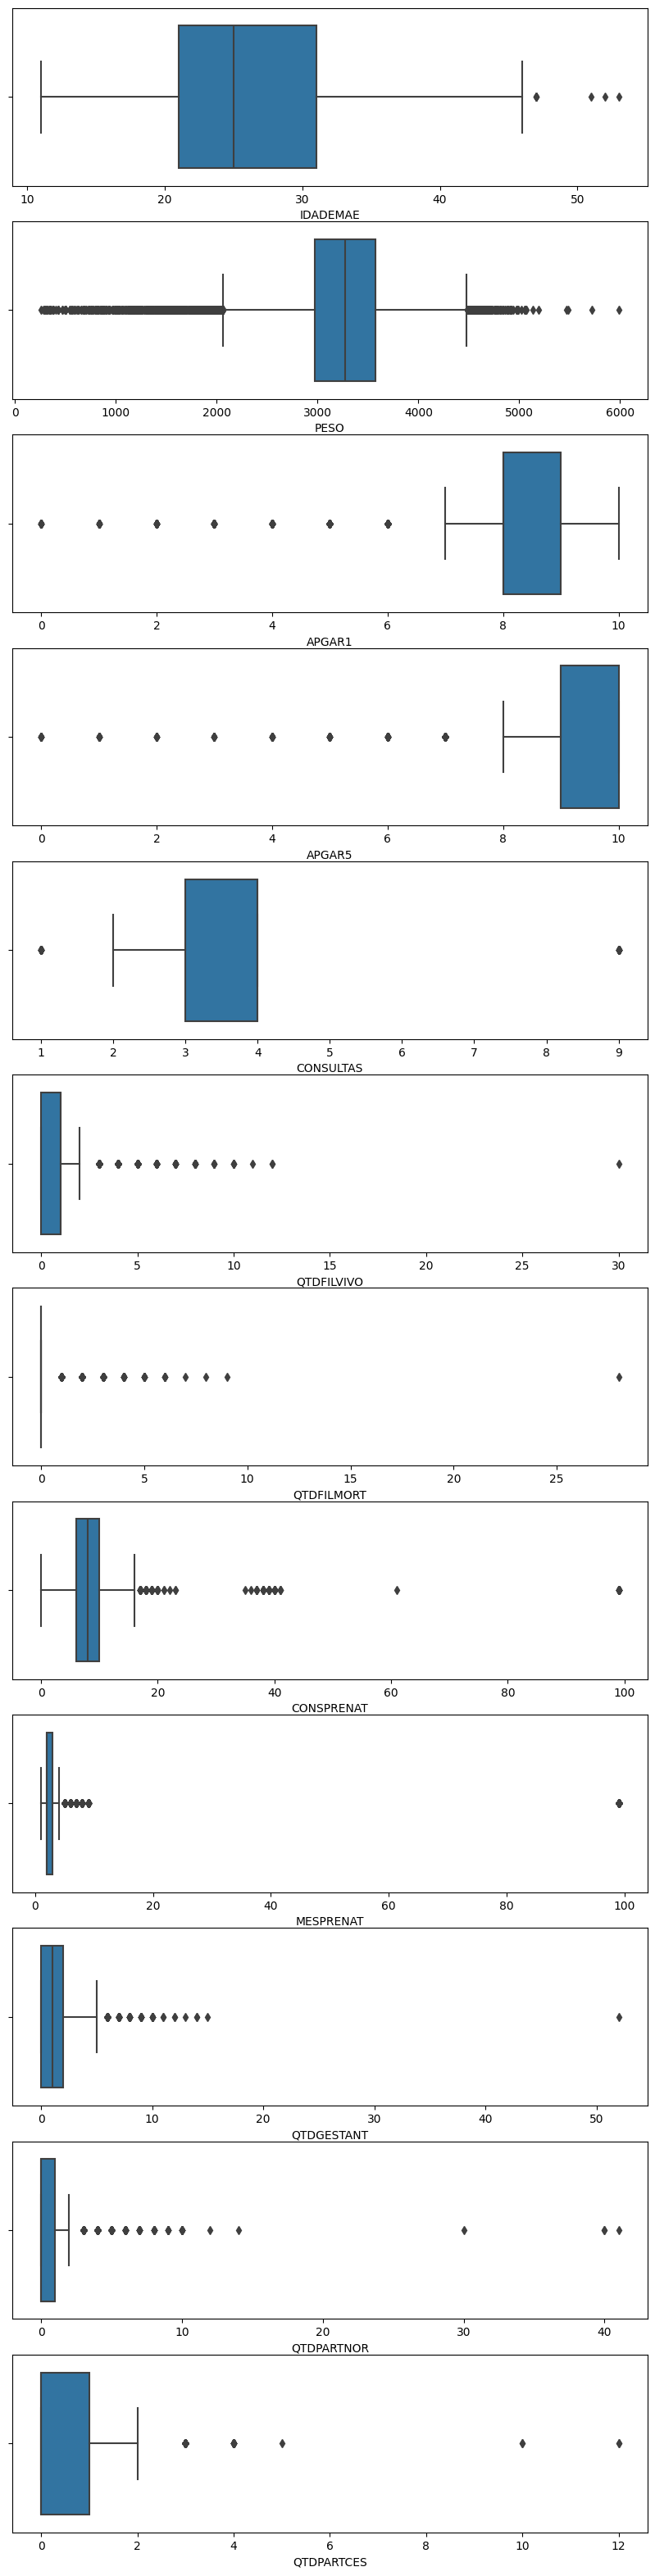

In [292]:
plt.close('all')
plt.rc('figure', figsize=(10, 40))
fig, axes = plt.subplots(12, 1)

sns.boxplot(ax=axes[0], x='IDADEMAE', data=df)
sns.boxplot(ax=axes[1], x='PESO', data=df)
sns.boxplot(ax=axes[2], x='APGAR1', data=df)
sns.boxplot(ax=axes[3], x='APGAR5', data=df)
sns.boxplot(ax=axes[4], x='CONSULTAS', data=df)

sns.boxplot(ax=axes[5], x='QTDFILVIVO', data=df)
sns.boxplot(ax=axes[6], x='QTDFILMORT', data=df)
sns.boxplot(ax=axes[7], x='CONSPRENAT', data=df)
sns.boxplot(ax=axes[8], x='MESPRENAT', data=df)
sns.boxplot(ax=axes[9], x='QTDGESTANT', data=df)

sns.boxplot(ax=axes[10], x='QTDPARTNOR', data=df)
sns.boxplot(ax=axes[11], x='QTDPARTCES', data=df)

plt.show()

### Histograma das colunas numéricas

## Métricas

### Describe nas colunas

- Colunas categóricas

In [293]:
df.select_dtypes('category').describe().transpose()

,count,unique,top,freq
ESCMAE,24332,5,8 a 11 anos,14435
GESTACAO,24332,6,37 a 41 semanas,21462
GRAVIDEZ,24332,3,Única,23884
PARTO,24332,2,Cesáreo,16480
SEXO,24332,2,Masculino,12467
RACACOR,24332,5,Parda,18016
munResNome,24332,52,Porto Velho,6799
munResUf,24332,1,Rondônia,24332
DTNASC_DIA,24332,7,Segunda-feira,4042
DTNASC_MES,24332,12,Março,2202


- Colunas numéricas

In [294]:
df.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
IDADEMAE,24332.0,26.014836,6.358127,11.00000,21.00000,25.00000,31.00000,53.00000
ESTCIVMAE,24332.0,2.549359,1.652048,1.00000,1.00000,2.00000,5.00000,9.00000
QTDFILVIVO,24332.0,1.036865,1.120351,0.00000,0.00000,1.00000,1.00000,30.00000
QTDFILMORT,24332.0,0.245027,0.594494,0.00000,0.00000,0.00000,0.00000,28.00000
CONSULTAS,24332.0,3.674503,0.626634,1.00000,3.00000,4.00000,4.00000,9.00000
HORANASC,24332.0,1267.547551,571.913444,0.00000,907.00000,1227.50000,1711.00000,2359.00000
APGAR1,24332.0,8.136692,0.976384,0.00000,8.00000,8.00000,9.00000,10.00000
APGAR5,24332.0,9.181695,0.776905,0.00000,9.00000,9.00000,10.00000,10.00000
PESO,24332.0,3247.610801,538.633314,258.00000,2970.00000,3275.00000,3575.00000,5985.00000
IDANOMAL,24332.0,2.027166,0.502881,1.00000,2.00000,2.00000,2.00000,9.00000


### Matriz de correlação

<Axes: >

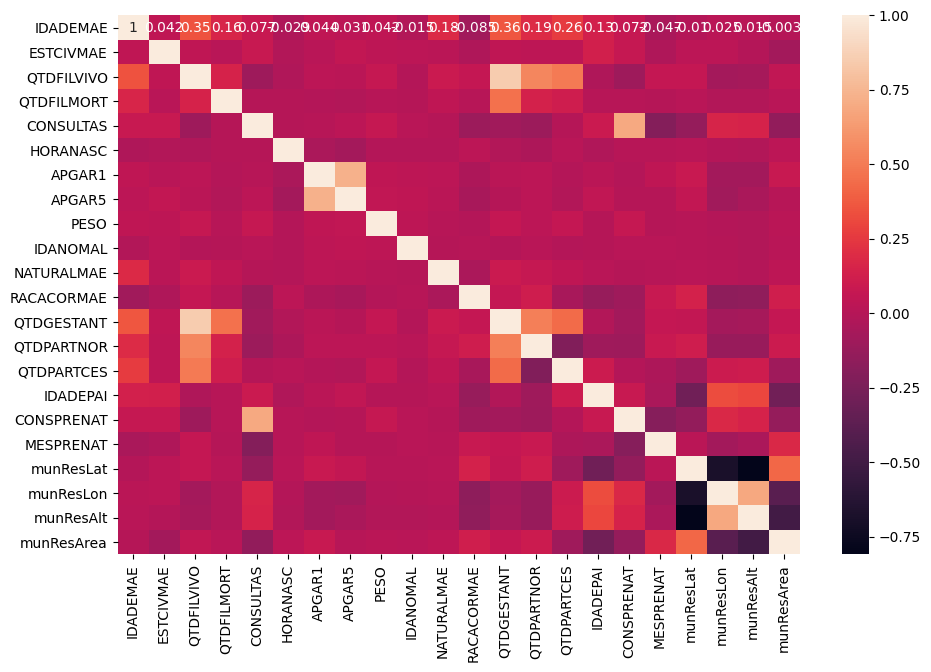

In [295]:
numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr(method='kendall')
plt.figure(figsize=(11, 7))
sns.heatmap(corr, annot=True)

## Pergunta 1

## Conclusão e hipótese

**Atingimos o nosso objetivo!**

Agora compreendemos melhor os dados que temos à nossa disposição para podermos realizar análises mais precisas, levando em consideração todas as nuances relativas aos dados, para obter os melhore Insights.

*Conclusão da analise exploratória:*

*############################################################################
############################################################################
############################################################################
############################################################################
##########################################

############################################################################
############################################################################
########

############################################################################
############################################################################
############################################################################
############################################################################
############################################################################
###############################################################*

### **`Perguntas`**

<ol type="1">
  <li>Carregamento dos dados e dos pacotes</li>
</ol>

Se quiser acessar as respostas dessas perguntas vá para o próximo projeto: [Análise descritiva]()

<p align="center">
  Enzo Schitini
</p>

<p align="center">
  Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator
</p>